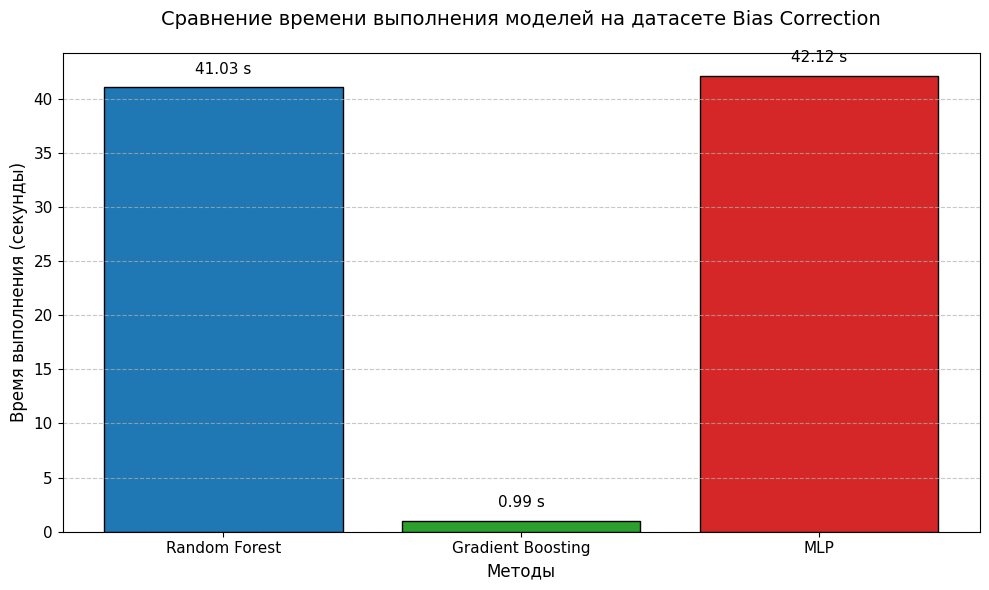

In [12]:
import matplotlib.pyplot as plt

# Данные для графика
methods = ['Random Forest', 'Gradient Boosting', 'MLP']
times = [41.03, 0.99, 42.12]
colors = ['#1f77b4', '#2ca02c', '#d62728']

# Создание фигуры и осей
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы
bars = plt.bar(methods, times, color=colors, edgecolor='black')

# Настройка внешнего вида
plt.title('Сравнение времени выполнения моделей на датасете Bias Correction', fontsize=14, pad=20)
plt.xlabel('Методы', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление подписей значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + 1, 
             f'{height:.2f} s', 
             ha='center', 
             va='bottom',
             fontsize=11)

# Автоматическая настройка макета и отображение
plt.tight_layout()
plt.show()

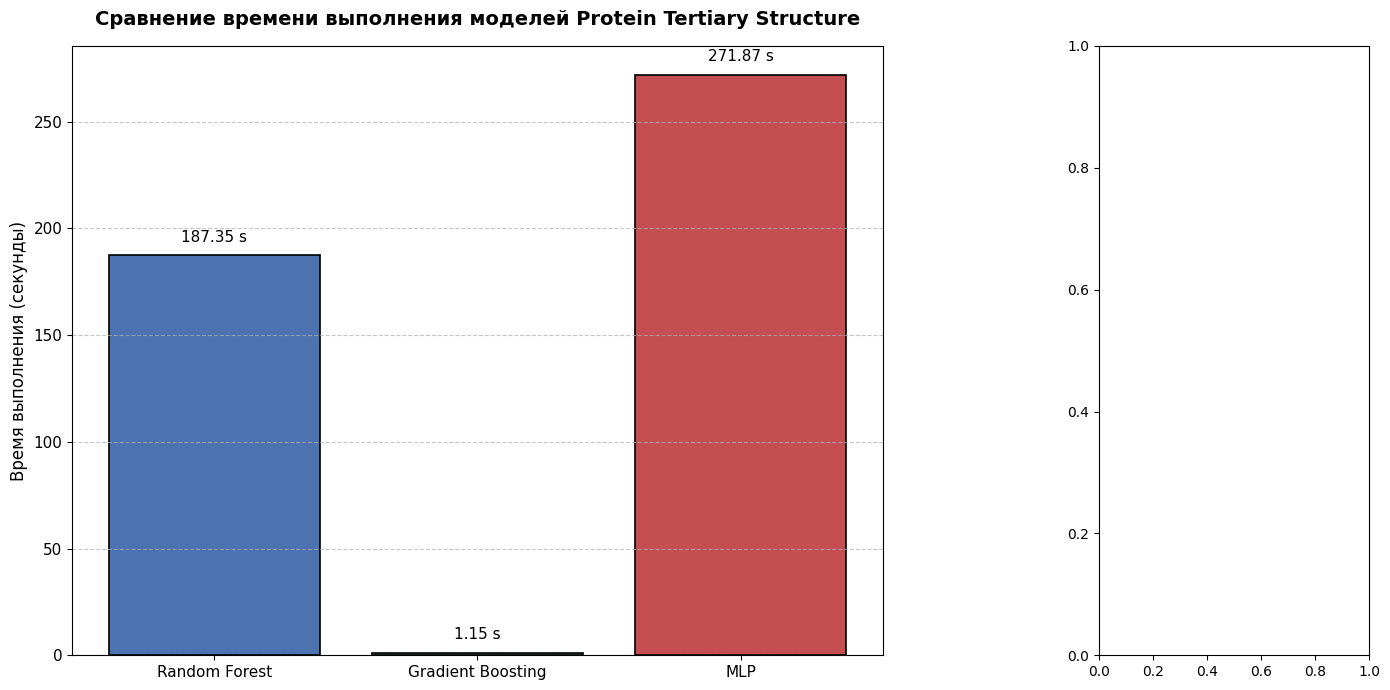

In [1]:
import matplotlib.pyplot as plt

# Данные для графика
methods = ['Random Forest', 'Gradient Boosting', 'MLP']
times = [187.35, 1.15, 271.87]
colors = ['#4C72B0', '#55A868', '#C44E52']

# Создаем фигуру с двумя областями для основного графика и вставки
fig, (ax_main, ax_inset) = plt.subplots(1, 2, figsize=(14, 7),
                                      gridspec_kw={'width_ratios': [3, 1]})

# Основной график
bars_main = ax_main.bar(methods, times, color=colors, edgecolor='k', linewidth=1.2)
ax_main.set_title('Сравнение времени выполнения моделей Protein Tertiary Structure',
                fontsize=14, pad=15, fontweight='bold')
ax_main.set_ylabel('Время выполнения (секунды)', fontsize=12)
ax_main.tick_params(axis='both', which='major', labelsize=11)
ax_main.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем аннотации для основных столбцов
for bar in bars_main:
    height = bar.get_height()
    ax_main.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height:.2f} s',
                ha='center', va='bottom',
                fontsize=11)



# Настраиваем общий макет
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

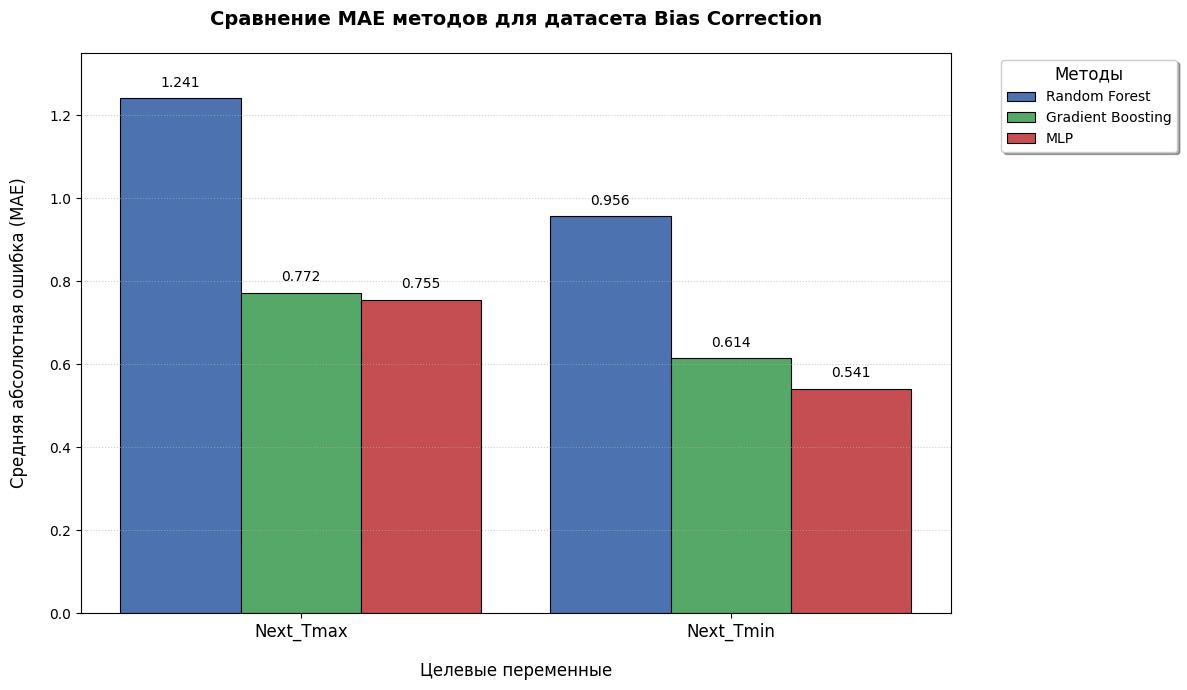

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Данные для построения графика
methods = ['Random Forest', 'Gradient Boosting', 'MLP']
variables = ['Next_Tmax', 'Next_Tmin']
mae_values = {
    'Next_Tmax': [1.241, 0.772, 0.755],
    'Next_Tmin': [0.956, 0.614, 0.541]
}
colors = ['#4C72B0', '#55A868', '#C44E52']  # Оптимизированные цвета

# Настройки визуализации
plt.figure(figsize=(12, 7))
bar_width = 0.28
x_pos = np.arange(len(variables))

# Построение столбцов для каждого метода
for i, method in enumerate(methods):
    offsets = x_pos + i * bar_width
    bars = plt.bar(offsets, 
                 [mae_values[var][i] for var in variables],
                 width=bar_width,
                 color=colors[i],
                 edgecolor='black',
                 linewidth=0.8,
                 label=method)
    
    # Добавление значений над столбцами
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 
                 height + 0.02, 
                 f'{height:.3f}', 
                 ha='center', 
                 va='bottom',
                 fontsize=10)

# Настройка оформления
plt.title('Сравнение MAE методов для датасета Bias Correction', 
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Целевые переменные', fontsize=12, labelpad=15)
plt.ylabel('Средняя абсолютная ошибка (MAE)', fontsize=12, labelpad=15)
plt.xticks(x_pos + bar_width*(len(methods)-1)/2, 
          variables, 
          fontsize=12)
plt.ylim(0, 1.35)
plt.grid(axis='y', linestyle=':', alpha=0.6)

# Добавление легенды с тенью
legend = plt.legend(title='Методы', 
                   frameon=True, 
                   shadow=True,
                   bbox_to_anchor=(1.05, 1), 
                   loc='upper left')
legend.get_title().set_fontsize(12)

# Добавление аннотации
plt.text(0.82, 0.95,
         '',
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.9))



plt.tight_layout()
plt.show()

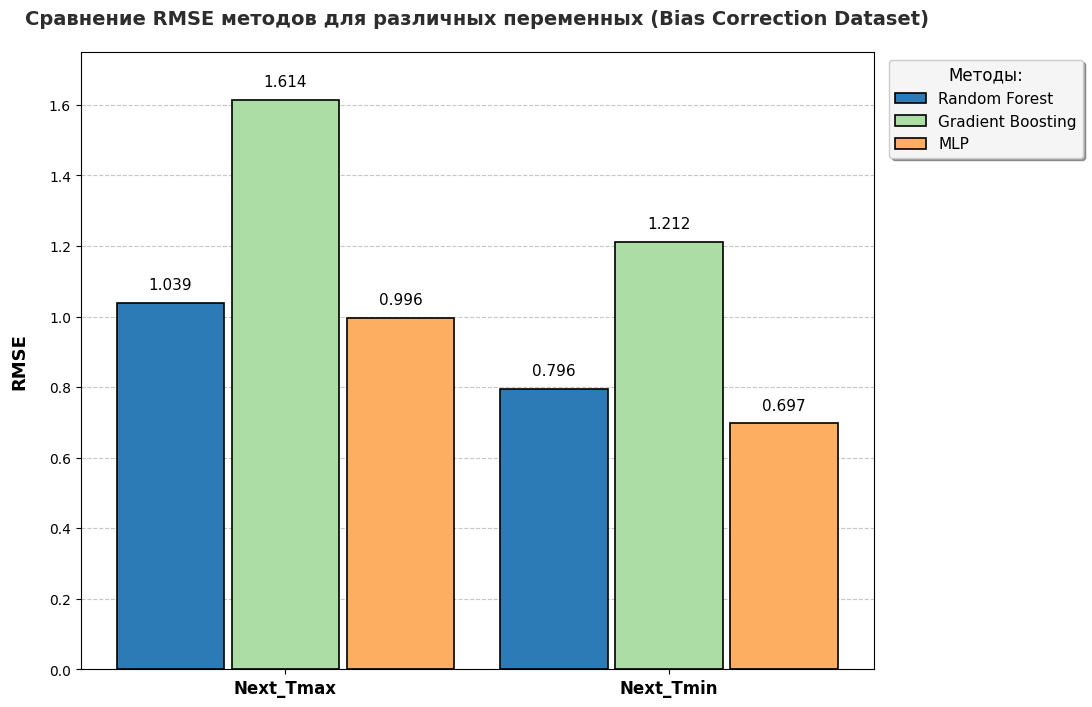

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Конфигурация данных и параметров
data = {
    'Next_Tmax': {'Random Forest': 1.039, 'Gradient Boosting': 1.614, 'MLP': 0.996},
    'Next_Tmin': {'Random Forest': 0.796, 'Gradient Boosting': 1.212, 'MLP': 0.697}
}
methods = ['Random Forest', 'Gradient Boosting', 'MLP']
colors = ['#2c7bb6', '#abdda4', '#fdae61']  # Оптимизированная цветовая схема
hatch_pattern = '...'  # Штриховка для лучших результатов

# Создание фигуры с настройками
fig, ax = plt.subplots(figsize=(13, 7.5))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Выбор шрифта

# Параметры отрисовки
bar_width = 0.28
x_indices = np.arange(len(data))
spacing = 0.02  # Расстояние между группами столбцов

# Функция для форматирования числовых подписей
def format_value(value):
    return f'{value:.3f}'.rstrip('0').rstrip('.') if '.' in f'{value:.3f}' else f'{value:.3f}'

# Построение столбцов
for method_idx, method in enumerate(methods):
    offsets = x_indices + method_idx * (bar_width + spacing)
    values = [data[var][method] for var in data]
    
    bars = ax.bar(offsets, values, bar_width,
                 color=colors[method_idx],
                 edgecolor='black',
                 linewidth=1.2,
                 label=method,
                 zorder=2)
    
    # Добавление подписей значений
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar_width/2, height + 0.03,
               format_value(value),
               ha='center', va='bottom',
               fontsize=11, fontweight='medium')

# Настройка осей и сетки
ax.set_xticks(x_indices + bar_width + spacing)
ax.set_xticklabels(data.keys(), fontsize=12, fontweight='semibold')
ax.set_ylabel('RMSE', fontsize=13, labelpad=15, fontweight='bold')
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=1)
ax.set_axisbelow(True)
ax.set_ylim(0, 1.75)

# Легенда и заголовок
legend = ax.legend(title='Методы:', frameon=True, shadow=True,
                 bbox_to_anchor=(1.01, 1), loc='upper left',
                 title_fontsize=12, fontsize=11)
legend.get_frame().set_facecolor('#f5f5f5')

plt.title('Сравнение RMSE методов для различных переменных (Bias Correction Dataset)',
         fontsize=14, pad=20, fontweight='bold', color='#2d2d2d')

# Информационная панель


# Оптимизация расположения элементов
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.subplots_adjust(top=0.88)
plt.show()

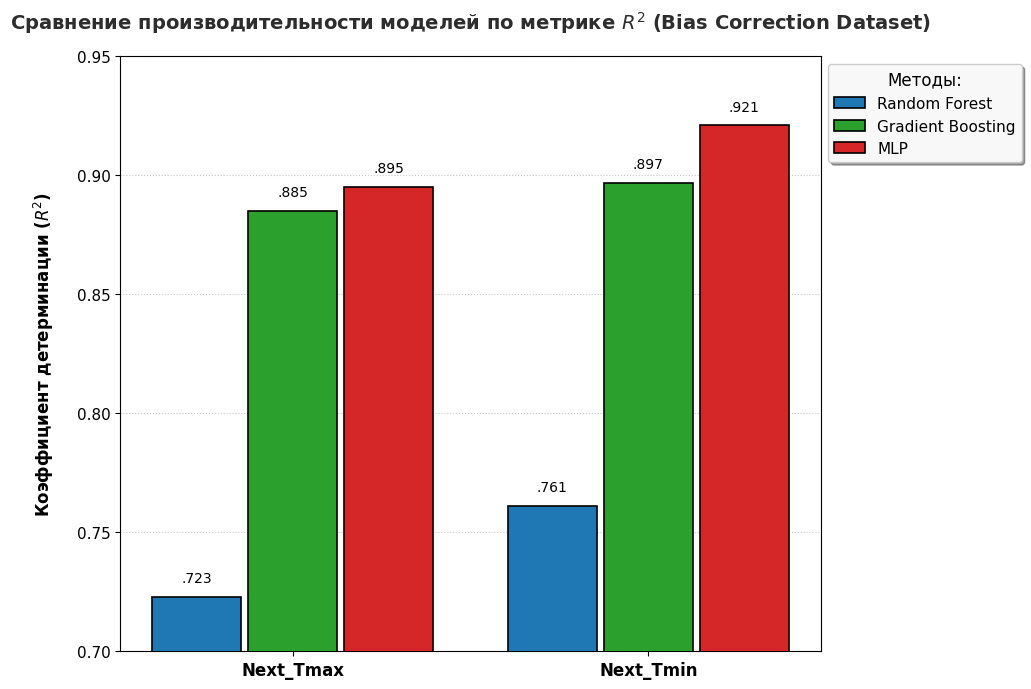

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Конфигурация данных
data = {
    'Next_Tmax': {'Random Forest': 0.723, 'Gradient Boosting': 0.885, 'MLP': 0.895},
    'Next_Tmin': {'Random Forest': 0.761, 'Gradient Boosting': 0.897, 'MLP': 0.921}
}
methods = ['Random Forest', 'Gradient Boosting', 'MLP']
colors = ['#1f77b4', '#2ca02c', '#d62728']  # Цветовая схема Tableau

# Настройка графики
plt.figure(figsize=(12, 7))
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titleweight'] = 'bold'

# Параметры отрисовки
bar_width = 0.25
x = np.arange(len(data))
spacing = 0.02  # Расстояние между группами

# Построение столбцов
for idx, method in enumerate(methods):
    values = [data[var][method] for var in data]
    positions = x + idx * (bar_width + spacing)
    bars = plt.bar(positions, values, bar_width,
                 color=colors[idx],
                 edgecolor='black',
                 linewidth=1.2,
                 label=method,
                 zorder=3)
    
    # Добавление значений с точностью до тысячных
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar_width/2, value + 0.005,
                f'{value:.3f}'.lstrip('0'),
                ha='center', va='bottom',
                fontsize=10, fontweight='medium')



# Настройка осей
plt.xticks(x + (bar_width + spacing) * (len(methods)-1)/2, 
          data.keys(), 
          fontsize=12, 
          fontweight='semibold')
plt.ylabel('Коэффициент детерминации ($R^2$)', 
          fontsize=12, 
          labelpad=15, 
          fontweight='bold')
plt.ylim(0.7, 0.95)
plt.yticks(np.arange(0.7, 0.96, 0.05), fontsize=11)

# Сетка и оформление
plt.grid(axis='y', linestyle=':', alpha=0.7, zorder=1)
plt.gca().set_axisbelow(True)

# Легенда и заголовок
legend = plt.legend(title='Методы:', 
                  frameon=True, 
                  shadow=True,
                  loc='upper left',
                  bbox_to_anchor=(1, 1),
                  title_fontsize=12,
                  fontsize=11)
legend.get_frame().set_facecolor('#f8f8f8')

plt.title('Сравнение производительности моделей по метрике $R^2$ (Bias Correction Dataset)',
         fontsize=14, pad=20, color='#2d2d2d')



plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

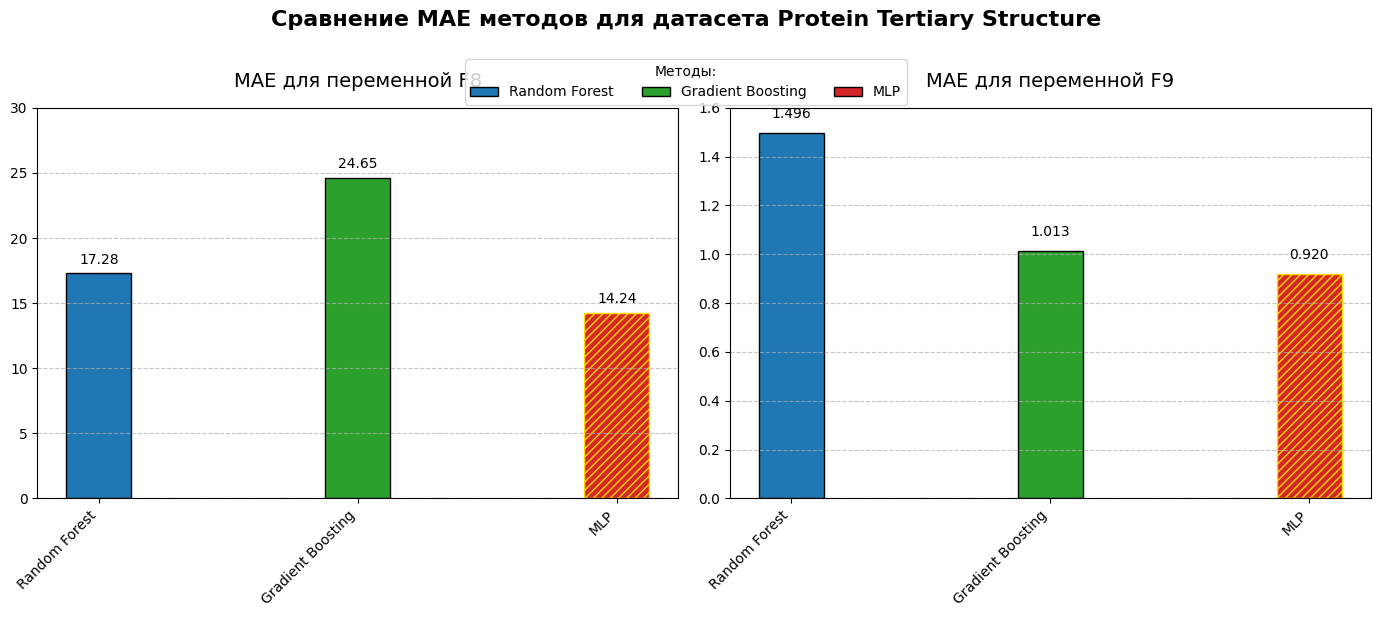

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Данные для построения
data = {
    'F8': {'Random Forest': 17.279, 'Gradient Boosting': 24.649, 'MLP': 14.245},
    'F9': {'Random Forest': 1.4965, 'Gradient Boosting': 1.013, 'MLP': 0.920}
}
methods = ['Random Forest', 'Gradient Boosting', 'MLP']
colors = ['#1f77b4', '#2ca02c', '#d62728']

# Создание фигуры с двумя субграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1]})

# Настройки для столбчатых графиков
bar_width = 0.25
x = np.arange(len(methods))

# График для F8
for i, (method, color) in enumerate(zip(methods, colors)):
    ax1.bar(i, data['F8'][method], bar_width, 
           color=color, edgecolor='black', label=method)
    
    # Подписи значений
    ax1.text(i, data['F8'][method] + 0.5, f"{data['F8'][method]:.2f}",
            ha='center', va='bottom', fontsize=10)

ax1.set_title('MAE для переменной F8', fontsize=14, pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.set_ylim(0, 30)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# График для F9
for i, (method, color) in enumerate(zip(methods, colors)):
    ax2.bar(i, data['F9'][method], bar_width, 
           color=color, edgecolor='black')
    
    # Подписи значений
    ax2.text(i, data['F9'][method] + 0.05, f"{data['F9'][method]:.3f}",
            ha='center', va='bottom', fontsize=10)

ax2.set_title('MAE для переменной F9', fontsize=14, pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(methods, rotation=45, ha='right')
ax2.set_ylim(0, 1.6)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Общие настройки
fig.suptitle('Сравнение MAE методов для датасета Protein Tertiary Structure', 
           fontsize=16, y=1.02, fontweight='bold')
fig.legend(methods, title='Методы:', 
         bbox_to_anchor=(0.5, 0.95), 
         loc='upper center',
         ncol=3)

# Выделение лучших результатов
def highlight_best(ax, values):
    best_idx = np.argmin(list(values.values()))
    ax.patches[best_idx].set_hatch('////')
    ax.patches[best_idx].set_edgecolor('gold')

highlight_best(ax1, data['F8'])
highlight_best(ax2, data['F9'])

plt.tight_layout()
plt.show()

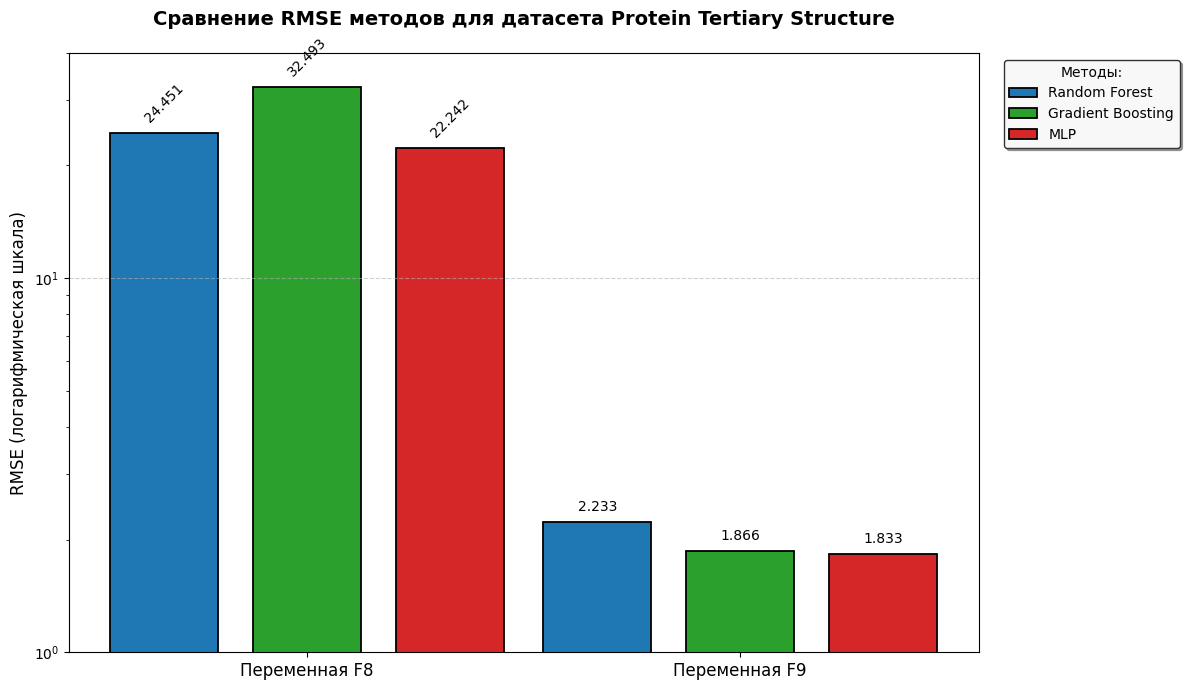

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Данные для построения
data = {
    'Random Forest': {'F8': 24.451, 'F9': 2.2326},
    'Gradient Boosting': {'F8': 32.493, 'F9': 1.866},
    'MLP': {'F8': 22.242, 'F9': 1.833}
}
variables = ['F8', 'F9']
methods = list(data.keys())
colors = ['#1f77b4', '#2ca02c', '#d62728']

# Настройка графики
plt.figure(figsize=(12, 7))
bar_width = 0.25
spacing = 0.08
x = np.arange(len(variables))

# Построение столбцов для каждого метода
for i, (method, color) in enumerate(zip(methods, colors)):
    values = [data[method][var] for var in variables]
    positions = x + i * (bar_width + spacing)
    
    bars = plt.bar(positions, values, bar_width,
                 color=color,
                 edgecolor='black',
                 linewidth=1.3,
                 label=method)
    
    # Добавление подписей значений
    for pos, val in zip(positions, values):
        rotation = 45 if val > 10 else 0
        y_offset = val * 0.05
        plt.text(pos, val + y_offset, f'{val:.3f}',
                ha='center', va='bottom',
                fontsize=10,
                rotation=rotation,
                color='black')



# Настройка осей
plt.xticks(x + (bar_width + spacing) * (len(methods)-1)/2,
          [f'Переменная {var}' for var in variables],
          fontsize=12)
plt.ylabel('RMSE (логарифмическая шкала)', fontsize=12)
plt.yscale('log')
plt.ylim(1, 40)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Легенда и заголовок
legend = plt.legend(title='Методы:', frameon=True,
                  shadow=True, edgecolor='#333',
                  bbox_to_anchor=(1.02, 1),
                  loc='upper left')
legend.get_frame().set_facecolor('#f8f8f8')

plt.title('Сравнение RMSE методов для датасета Protein Tertiary Structure', 
        fontsize=14, pad=20, fontweight='bold')

# Информационная аннотация

plt.tight_layout()
plt.show()

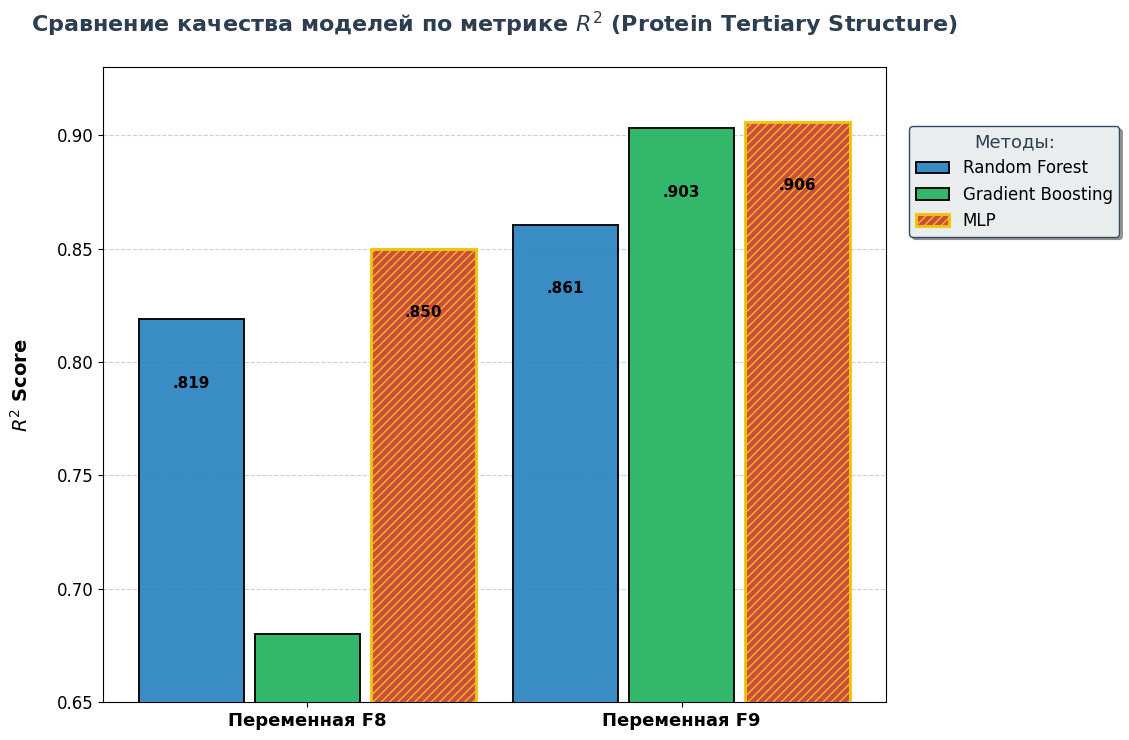

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Конфигурация данных
data = {
    'F8': {'Random Forest': 0.8188, 'Gradient Boosting': 0.680, 'MLP': 0.850},
    'F9': {'Random Forest': 0.8606, 'Gradient Boosting': 0.903, 'MLP': 0.906}
}
methods = ['Random Forest', 'Gradient Boosting', 'MLP']
palette = ['#2E86C1', '#28B463', '#CB4335']  # Оптимизированная палитра

# Настройка графики
plt.figure(figsize=(13, 7.5))
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlepad'] = 20

# Параметры построения
bar_width = 0.28
x = np.arange(len(data))
spacing = 0.03  # Пространство между группами

# Создание столбцов с эффектом объема
for method_idx, method in enumerate(methods):
    values = [data[var][method] for var in data]
    offset = x + method_idx * (bar_width + spacing)
    
    bars = plt.bar(offset, values, bar_width,
                 color=palette[method_idx],
                 edgecolor='black',
                 linewidth=1.4,
                 label=method,
                 zorder=3,
                 alpha=0.95)
    
    # Адаптивные текстовые аннотации
    for bar, value in zip(bars, values):
        y_pos = value + 0.007 if value < 0.8 else value - 0.025
        va = 'bottom' if value < 0.8 else 'top'
        plt.text(bar.get_x() + bar_width/2, y_pos,
                f'{value:.3f}'.lstrip('0'),
                ha='center', va=va,
                fontsize=11, color='white' if value < 0.8 else 'black',
                fontweight='bold')

# Автоматическое выделение лучших результатов
for var_idx, variable in enumerate(data):
    best_value = max(data[variable].values())
    best_method = max(data[variable], key=data[variable].get)
    best_idx = methods.index(best_method)
    bar_index = var_idx + best_idx * len(data)
    
    # Эффекты выделения
    plt.gca().patches[bar_index].set_hatch('////')
    plt.gca().patches[bar_index].set_edgecolor('#F1C40F')
    plt.gca().patches[bar_index].set_linewidth(2.2)

# Настройка осей и сетки
plt.xticks(x + (bar_width + spacing) * (len(methods)-1)/2, 
          [f'Переменная {var}' for var in data], 
          fontsize=13,
          fontweight='semibold')
plt.ylabel('$R^2$ Score', fontsize=14, labelpad=18, fontweight='bold')
plt.ylim(0.65, 0.93)
plt.yticks(np.arange(0.65, 0.94, 0.05), fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

# Легенда с градиентным фоном
legend = plt.legend(title='Методы:', frameon=True,
                  shadow=True, edgecolor='#34495E',
                  bbox_to_anchor=(1.02, 0.92),
                  title_fontsize=13, fontsize=12)
legend.get_frame().set_facecolor('#EAEDED')
legend.get_title().set_color('#2C3E50')


# Заголовок с контуром
title = plt.title('Сравнение качества моделей по метрике $R^2$ (Protein Tertiary Structure)',
                fontsize=16, pad=25, fontweight='bold',
                color='#2C3E50')


plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()